In [1]:
import requests
import os

url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_healed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

path_confirmed = "./Data/time_series_covid19_confirmed_global.csv"
path_healed = "./Data/time_series_covid19_recovered_global.csv"
path_deaths = "./Data/time_series_covid19_deaths_global.csv"

try: 
    os.mkdir("./Data")
except OSError as error: 
    print(error) 

r = requests.get(url_confirmed, allow_redirects=True)
with open(path_confirmed, "wb") as file:
    file.write(r.content)

r = requests.get(url_healed, allow_redirects=True)
with open(path_healed, "wb") as file:
    file.write(r.content)

r = requests.get(url_deaths, allow_redirects=True)
with open(path_deaths, "wb") as file:
    file.write(r.content)
    
print("Data refreshed")

[Errno 17] File exists: './Data'
Data refreshed


In [2]:
#First step, get the csv data and read it

import numpy as np
import pandas as pd

df_confirmed = pd.read_csv(path_confirmed)
df_confirmed.head()

df_healed = pd.read_csv(path_healed)
df_healed.head()

df_deaths = pd.read_csv(path_deaths)
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,187,193,205,216,218,219,220,227,235,246
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,32,32,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,568,575,582,592,600,609,617,623,630,638
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,4,4,4,4,4,4,4


In [9]:
#Get data for one country

country = "France"

print(df_confirmed.loc[(df_confirmed['Country/Region'] == country)])
item = df_confirmed.loc[(df_confirmed['Country/Region'] == country)]
item_array = item.groupby(['Country/Region']).sum().to_numpy()
item_confirmed = item_array[0,2:-1:1]
item_confirmed = item_confirmed.astype('float32')
print(item_confirmed)

item = df_healed.loc[(df_healed['Country/Region'] == country)]
item_array = item.groupby(['Country/Region']).sum().to_numpy()
item_healed = item_array[0,2:-1:1]
item_healed = item_healed.astype('float32')
print(item_healed)

item = df_deaths.loc[(df_deaths['Country/Region'] == country)]
item_array = item.groupby(['Country/Region']).sum().to_numpy()
item_deaths = item_array[0,2:-1:1]
item_deaths = item_deaths.astype('float32')
print(item_deaths)

#Normalize values between 0 and 1

max_value = np.max(item_confirmed)
item_confirmed_norm = item_confirmed / max_value
item_deaths_norm = item_deaths / max_value
item_healed_norm = item_healed / max_value
item_active = item_confirmed_norm - item_deaths_norm - item_healed_norm

                Province/State Country/Region      Lat      Long  1/22/20  \
107              French Guiana         France   3.9339  -53.1258        0   
108           French Polynesia         France -17.6797  149.4068        0   
109                 Guadeloupe         France  16.2500  -61.5833        0   
110                    Mayotte         France -12.8275   45.1662        0   
111              New Caledonia         France -20.9043  165.6180        0   
112                    Reunion         France -21.1351   55.2471        0   
113           Saint Barthelemy         France  17.9000  -62.8333        0   
114                  St Martin         France  18.0708  -63.0501        0   
115                 Martinique         France  14.6415  -61.0242        0   
116                        NaN         France  46.2276    2.2137        0   
258  Saint Pierre and Miquelon         France  46.8852  -56.3159        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/20/20  5/21/20  \


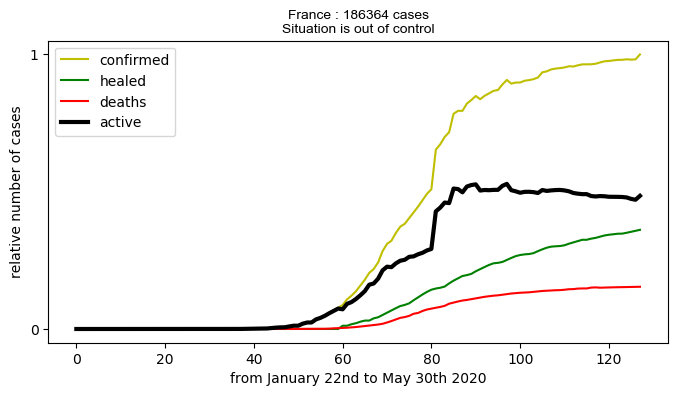

In [10]:
# quick and dirty analysis on the active cases curve,
# compare peak value with last value
peak_active = np.max(item_active)
if item_active[-1] > 0.9*peak_active:
    tendency = "Situation is out of control"
elif item_active[-1] > 0.5*peak_active:
    tendency = "Sitation is bad, but stable"
elif item_active[-1] > 0.1*peak_active:
    tendency = "Sitation is good, but watch out the second wave"
elif item_active[-1] > 0:
    tendency = "Almost recovered"
else:
    tendency = "Free of Covid-19"
  
#Get today's day
from datetime import date

today = date.today()
day_of_today = today.strftime("%B %d")
if day_of_today[-1] == '1':
    ending='st'
elif day_of_today[-1] == '2':
    ending='nd'
elif day_of_today[-1] == '3':
    ending='rd'
else:
    ending='th'

import matplotlib.pyplot as plt

#Max value as string
max_val=np.array2string(max_value.astype(int))

plt.figure(figsize=(8,4), dpi=100)
plt.plot(item_confirmed_norm, 'y', label='confirmed')
plt.plot(item_healed_norm, 'g', label='healed')
plt.plot(item_deaths_norm, 'r', label='deaths')
plt.plot(item_active, 'k', label='active', linewidth=3)
plt.title(country+' : '+max_val + ' cases'+'\n'+tendency, fontdict={'fontname': 'Arial', 'fontsize': 10})
plt.xlabel('from January 22nd to '+day_of_today+ending+' 2020')
plt.ylabel('relative number of cases')
plt.yticks([0,1])
plt.legend(loc='upper left')
plt.show()


In [11]:
country = "Macau"
region_label = "Country/Region"

item = df_confirmed.loc[(df_confirmed[region_label] == country)]
if item.shape[0] == 0:
    region_label = "Province/State"
    item = df_confirmed.loc[(df_confirmed[region_label] == country)]
item_array = item.groupby([region_label]).sum().to_numpy()
print(item_array)
item_confirmed = item_array[0,2:-1:1]
item_confirmed = item_confirmed.astype('float32')
print(item_confirmed)

[[ 22.1667 113.55     1.       2.       2.       2.       5.       6.
    7.       7.       7.       7.       7.       8.       8.      10.
   10.      10.      10.      10.      10.      10.      10.      10.
   10.      10.      10.      10.      10.      10.      10.      10.
   10.      10.      10.      10.      10.      10.      10.      10.
   10.      10.      10.      10.      10.      10.      10.      10.
   10.      10.      10.      10.      10.      10.      10.      10.
   11.      12.      15.      17.      17.      18.      24.      24.
   25.      30.      31.      33.      37.      37.      38.      41.
   41.      41.      43.      43.      44.      44.      44.      45.
   45.      45.      45.      45.      45.      45.      45.      45.
   45.      45.      45.      45.      45.      45.      45.      45.
   45.      45.      45.      45.      45.      45.      45.      45.
   45.      45.      45.      45.      45.      45.      45.      45.
   45.      45.     

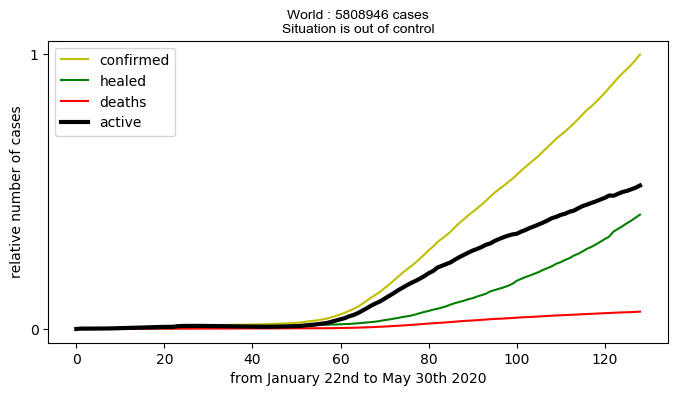

In [12]:
country = "World"

#New Code

item_array = df_deaths.sum(axis = 0,skipna = True).to_numpy()
item_deaths = item_array[2:-1:1]
item_deaths = item_deaths.astype('float32')

item_array = df_confirmed.sum(axis = 0,skipna = True).to_numpy()
item_confirmed = item_array[2:-1:1]
item_confirmed = item_confirmed.astype('float32')

item_array = df_healed.sum(axis = 0,skipna = True).to_numpy()
item_healed = item_array[2:-1:1]
item_healed = item_healed.astype('float32')

#Same as before

max_value = np.max(item_confirmed)
item_confirmed_norm = item_confirmed / max_value
item_deaths_norm = item_deaths / max_value
item_healed_norm = item_healed / max_value
item_active = item_confirmed_norm - item_deaths_norm - item_healed_norm

peak_active = np.max(item_active)
if item_active[-1] > 0.9*peak_active:
    tendency = "Situation is out of control"
elif item_active[-1] > 0.5*peak_active:
    tendency = "Sitation is bad, but stable"
elif item_active[-1] > 0.1*peak_active:
    tendency = "Sitation is good, but watch out the second wave"
elif item_active[-1] > 0:
    tendency = "Almost recovered"
else:
    tendency = "Free of Covid-19"
  
#Get today's day
from datetime import date

today = date.today()
day_of_today = today.strftime("%B %d")
if day_of_today[-1] == '1':
    ending='st'
elif day_of_today[-1] == '2':
    ending='nd'
elif day_of_today[-1] == '2':
    ending='rd'
else:
    ending='th'

import matplotlib.pyplot as plt

#Max value as string
max_val=np.array2string(max_value.astype(int))

plt.figure(figsize=(8,4), dpi=100)
plt.plot(item_confirmed_norm, 'y', label='confirmed')
plt.plot(item_healed_norm, 'g', label='healed')
plt.plot(item_deaths_norm, 'r', label='deaths')
plt.plot(item_active, 'k', label='active', linewidth=3)
plt.title(country+' : '+max_val + ' cases'+'\n'+tendency, fontdict={'fontname': 'Arial', 'fontsize': 10})
plt.xlabel('from January 22nd to '+day_of_today+ending+' 2020')
plt.ylabel('relative number of cases')
plt.yticks([0,1])
plt.legend(loc='upper left')
plt.show()

In [13]:
country_list = ["Switzerland", "France", "Macau", "World", "Atlantis"]

def select_country(country):
    
    if country == "World":
        item_array = df_deaths.sum(axis = 0,skipna = True).to_numpy()
        item_deaths = item_array[2:-1:1]
        item_deaths = item_deaths.astype('float32')

        item_array = df_confirmed.sum(axis = 0,skipna = True).to_numpy()
        item_confirmed = item_array[2:-1:1]
        item_confirmed = item_confirmed.astype('float32')

        item_array = df_healed.sum(axis = 0,skipna = True).to_numpy()
        item_healed = item_array[2:-1:1]
        item_healed = item_healed.astype('float32')
    else:
        # check if variable country is actually a Country or a State
        region_label = "Country/Region"
        item = df_confirmed.loc[(df_confirmed[region_label] == country)]
        if item.shape[0] == 0:
            region_label = "Province/State"
            item = df_confirmed.loc[(df_confirmed[region_label] == country)]
            if item.shape[0] == 0:
                print("Couldn't find such Country or State")
                sys.exit(1)
        # Get an array for the given country
        # some countries have several rows and need to be summed
        item = df_confirmed.loc[(df_confirmed[region_label] == country)]
        item_array = item.groupby([region_label]).sum().to_numpy()
        item_confirmed = item_array[0,2:-1:1]
        item_confirmed = item_confirmed.astype('float32')

        item = df_healed.loc[(df_healed[region_label] == country)]
        item_array = item.groupby([region_label]).sum().to_numpy()
        item_healed = item_array[0,2:-1:1]
        item_healed = item_healed.astype('float32')

        item = df_deaths.loc[(df_deaths[region_label] == country)]
        item_array = item.groupby([region_label]).sum().to_numpy()
        item_deaths = item_array[0,2:-1:1]
        item_deaths = item_deaths.astype('float32')

    max_value = np.max(item_confirmed)
    item_confirmed_norm = item_confirmed / max_value
    item_deaths_norm = item_deaths / max_value
    item_healed_norm = item_healed / max_value
    item_active = item_confirmed_norm - item_deaths_norm - item_healed_norm

    peak_active = np.max(item_active)
    if item_active[-1] > 0.9*peak_active:
        tendency = "Sitation is out of control"
    elif item_active[-1] > 0.5*peak_active:
        tendency = "Sitation is bad, but stable"
    elif item_active[-1] > 0.1*peak_active:
        tendency = "Sitation is good, but watch out the second wave"
    elif item_active[-1] > 0:
        tendency = "Almost recovered"
    else:
        tendency = "Free of Covid"

    return item_confirmed_norm, item_healed_norm, item_deaths_norm, item_active, np.array2string(max_value.astype(int)), tendency

for country in country_list:
    item_confirmed_norm,item_healed_norm, item_deaths_norm, item_active, max_value, tendency  = select_country(country)
    print(country+" : "+max_value + " cases -> "+tendency)


Switzerland : 30796 cases -> Almost recovered
France : 186364 cases -> Sitation is out of control
Macau : 45 cases -> Free of Covid
World : 5808946 cases -> Sitation is out of control
Couldn't find such Country or State


NameError: name 'sys' is not defined

In [17]:
sorted_countries = True

list_countries = set()
for item in range(df_confirmed.shape[0]):
   list_countries.add(str(df_confirmed.iloc[(item,1)]))

list_countries.add('Macau')
list_countries.add('Hong Kong')
if sorted_countries:
    list_countries=sorted(list_countries)
else:
    list_countries=list(list_countries)
list_countries.append('World')
list_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [18]:
for country in list_countries:
    item_confirmed_norm,item_healed_norm, item_deaths_norm, item_active, max_value, tendency  = select_country(country)
    if country == "Taiwan*":
        country = "Taiwan"
    print(country+" : "+max_value + " cases -> "+tendency)

Afghanistan : 13036 cases -> Sitation is out of control
Albania : 1076 cases -> Sitation is bad, but stable
Algeria : 8997 cases -> Sitation is out of control
Andorra : 763 cases -> Almost recovered
Angola : 74 cases -> Sitation is out of control
Antigua and Barbuda : 25 cases -> Sitation is good, but watch out the second wave
Argentina : 14702 cases -> Sitation is out of control
Armenia : 8216 cases -> Sitation is out of control
Australia : 7165 cases -> Almost recovered
Austria : 16628 cases -> Almost recovered
Azerbaijan : 4759 cases -> Sitation is out of control
Bahamas : 101 cases -> Sitation is bad, but stable
Bahrain : 10052 cases -> Sitation is out of control
Bangladesh : 40321 cases -> Sitation is out of control
Barbados : 92 cases -> Sitation is good, but watch out the second wave
Belarus : 39858 cases -> Sitation is out of control
Belgium : 57849 cases -> Sitation is out of control
Belize : 18 cases -> Free of Covid
Benin : 339 cases -> Sitation is good, but watch out the se

Somalia : 1828 cases -> Sitation is out of control
South Africa : 27403 cases -> Sitation is out of control
South Sudan : 994 cases -> Sitation is out of control
Spain : 237906 cases -> Sitation is bad, but stable
Sri Lanka : 1530 cases -> Sitation is out of control
Sudan : 4346 cases -> Sitation is out of control
Suriname : 12 cases -> Sitation is good, but watch out the second wave
Sweden : 35727 cases -> Sitation is out of control
Switzerland : 30796 cases -> Almost recovered
Syria : 122 cases -> Sitation is out of control
Taiwan : 441 cases -> Almost recovered
Tajikistan : 3563 cases -> Sitation is out of control
Tanzania : 509 cases -> Sitation is out of control
Thailand : 3065 cases -> Almost recovered
Timor-Leste : 24 cases -> Free of Covid
Togo : 422 cases -> Sitation is out of control
Trinidad and Tobago : 116 cases -> Free of Covid
Tunisia : 1068 cases -> Sitation is good, but watch out the second wave
Turkey : 160979 cases -> Sitation is good, but watch out the second wave
U

In [21]:
# At this point we will interrect with SuperCollider Programme 4_covid_sonification.scd

from pythonosc.udp_client import SimpleUDPClient

# pip install python-osc

ip_osc = "127.0.0.1"
port_osc = 9002
client_osc = SimpleUDPClient(ip_osc, port_osc)
print("ok")

ok


In [22]:
#Let's send a first message and see if we get it
client_osc.send_message("/test", ["hello",3.1415])

In [34]:
#Let's try to change the Frequency
client_osc.send_message("/cases", 200)
client_osc.send_message("/curve", [0,0])

In [41]:
import time

country_list = ["Switzerland", "Macau", "World"]

for country in country_list:
    item_confirmed_norm,item_healed_norm, item_deaths_norm, item_active, max_value, tendency  = select_country(country)
    print(country+" : "+max_value + " cases -> "+tendency)
    client_osc.send_message("/cases", float(max_value))
    for item in range(len(item_active)):
        pan=(2*item/len(item_active))-1 #value between -1 and 1
        client_osc.send_message("/curve", [item_active.item(item),pan])
        time.sleep(1/100)

# LAB TASK ! AS we can hear... nothing stopped the Synth
# Modify the code here to stop the sound

# Hint: we can reduce the amplitude for example, but we need a new receiver for that 

Switzerland : 30796 cases -> Almost recovered
Macau : 45 cases -> Free of Covid
World : 5808946 cases -> Sitation is out of control


In [42]:
# Ok we do the same but for the whole list of countries
# and  we record it in supercollider by sending a record start/stop instruction

client_osc.send_message("/startrecord",0)

for country in list_countries:
    item_confirmed_norm,item_healed_norm, item_deaths_norm, item_active, max_value, tendency  = select_country(country)
    if country == "Taiwan*":
        country = "Taiwan"
    print(country+" : "+max_value + " cases -> "+tendency)
    client_osc.send_message("/cases", float(max_value))
    for item in range(len(item_active)):
        pan=(2*item/len(item_active))-1 #value between -1 and 1
        client_osc.send_message("/curve", [item_active.item(item),pan])
        time.sleep(1/3000) #Here you can adjust the time inbetween each sending of a new sample

client_osc.send_message("/stoprecord",0)

Afghanistan : 13036 cases -> Sitation is out of control
Albania : 1076 cases -> Sitation is bad, but stable
Algeria : 8997 cases -> Sitation is out of control
Andorra : 763 cases -> Almost recovered
Angola : 74 cases -> Sitation is out of control
Antigua and Barbuda : 25 cases -> Sitation is good, but watch out the second wave
Argentina : 14702 cases -> Sitation is out of control
Armenia : 8216 cases -> Sitation is out of control
Australia : 7165 cases -> Almost recovered
Austria : 16628 cases -> Almost recovered
Azerbaijan : 4759 cases -> Sitation is out of control
Bahamas : 101 cases -> Sitation is bad, but stable
Bahrain : 10052 cases -> Sitation is out of control
Bangladesh : 40321 cases -> Sitation is out of control
Barbados : 92 cases -> Sitation is good, but watch out the second wave
Belarus : 39858 cases -> Sitation is out of control
Belgium : 57849 cases -> Sitation is out of control
Belize : 18 cases -> Free of Covid
Benin : 339 cases -> Sitation is good, but watch out the se

Serbia : 11300 cases -> Sitation is bad, but stable
Seychelles : 11 cases -> Free of Covid
Sierra Leone : 812 cases -> Sitation is out of control
Singapore : 33249 cases -> Sitation is bad, but stable
Slovakia : 1520 cases -> Sitation is good, but watch out the second wave
Slovenia : 1473 cases -> Almost recovered
Somalia : 1828 cases -> Sitation is out of control
South Africa : 27403 cases -> Sitation is out of control
South Sudan : 994 cases -> Sitation is out of control
Spain : 237906 cases -> Sitation is bad, but stable
Sri Lanka : 1530 cases -> Sitation is out of control
Sudan : 4346 cases -> Sitation is out of control
Suriname : 12 cases -> Sitation is good, but watch out the second wave
Sweden : 35727 cases -> Sitation is out of control
Switzerland : 30796 cases -> Almost recovered
Syria : 122 cases -> Sitation is out of control
Taiwan : 441 cases -> Almost recovered
Tajikistan : 3563 cases -> Sitation is out of control
Tanzania : 509 cases -> Sitation is out of control
Thailand